In [1]:
import numpy as np
from skimage import io
from skimage import img_as_float
import matplotlib.pyplot as plt
import pickle

In [2]:
def find_len(arr):
    i = 0
    j = 0
    k = np.int(np.shape(arr)[0]/2)
    while arr[k+1]<=arr[k]:
        i = i+1
        k = k+1
    k = np.int(np.shape(arr)[0]/2)
    while arr[k-1]<=arr[k]:
        j = j+1
        k = k-1
    return i+j

In [3]:
angles = np.linspace(-1,1,50)
parameters = pickle.load(open('parameters_Au_417.pickle','rb'))
step_xy = parameters['step_xy']

In [4]:
focal_plane = []
focal_spot = []
spot = []
fwhm = []
max_intensity = []
n = 100

for i in range(50):
    focal_plane.append(io.imread('tilt_'+str(angles[i])+'.tiff'))
    max_intensity.append(np.max(focal_plane[i]))
    x_,y_ = np.where(focal_plane[i]==np.max(focal_plane[i]))
    x_ = x_[0]
    y_ = y_[0]
    
    if (x_ > 100) & (y_>100):
        n = 100
    else : 
        n = 50
    focal_spot.append(focal_plane[i][x_-n:x_+n,y_-n:y_+n])
    spotx = find_len(focal_spot[i][n,:])
    spoty = find_len(focal_spot[i][:,n])
    spot.append([spotx,spoty])
    fwhm1 = len(np.where(focal_spot[i][n,:]>np.max(focal_spot[i][n,:])*0.5)[0])
    fwhm2 = len(np.where(focal_spot[i][:,n]>np.max(focal_spot[i][:,n])*0.5)[0])
    fwhm.append([fwhm1,fwhm2])

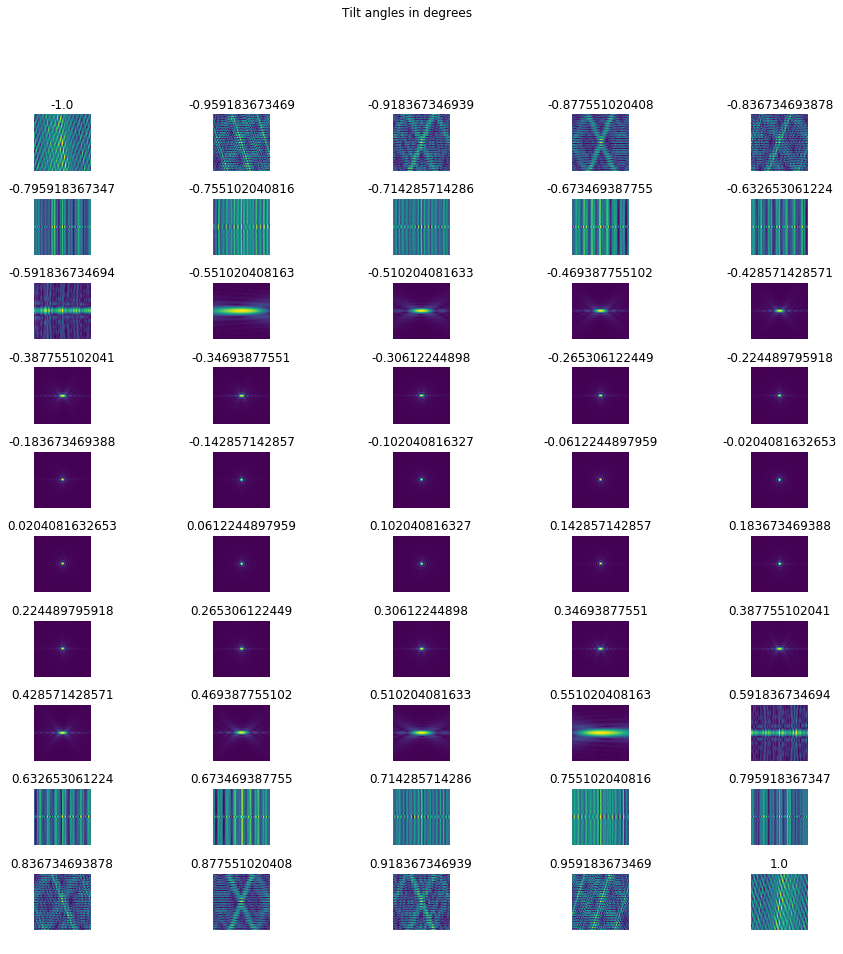

In [5]:
plt.clf()
f, axarr = plt.subplots(10,5)
k = 0
axis = []
for i in range(10):
    for j in range(5):
        axarr[i,j].imshow(focal_spot[k])
        axarr[i,j].axis('off')
        axarr[i,j].set_title(angles[k])
        axarr[i,j].title.set_y(1.01)
        #print(i,j,angles[k],k)
        axis.append(angles[k])
        k = k+1
f.set_size_inches(15, 15, forward=True)
f.subplots_adjust(wspace=0.5)
f.subplots_adjust(hspace=0.5)
f.suptitle('Tilt angles in degrees')
plt.show()

In [6]:
fwhm = np.array(fwhm)
spot = np.array(spot)

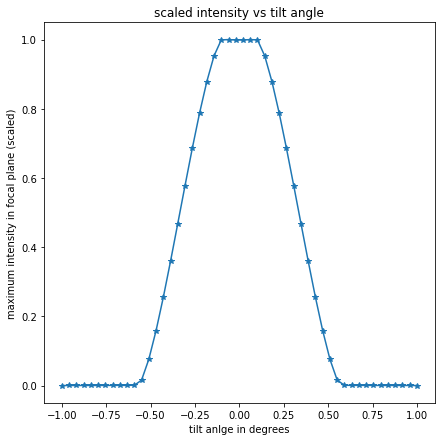

In [18]:
rel_intensity = np.array(max_intensity)/(np.max(np.array(max_intensity)))
plt.plot(axis,rel_intensity,'*-')
plt.ylabel('maximum intensity in focal plane (scaled)')
plt.xlabel('tilt anlge in degrees')
plt.title('scaled intensity vs tilt angle')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()
#for i in range(50):
#    print(i,rel_intensity[i],spot[i])

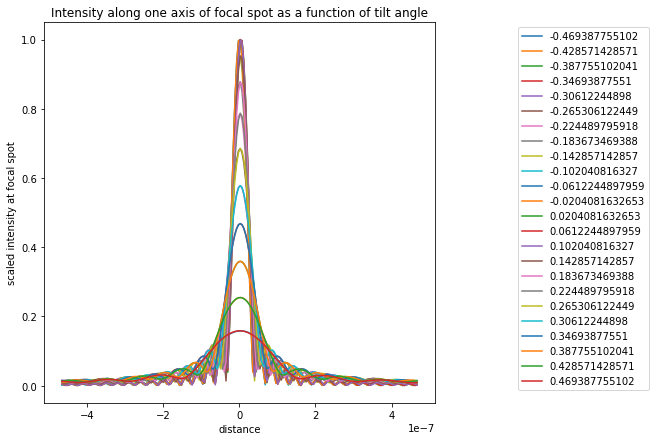

In [14]:
x_axis = np.linspace(-100*step_xy,100*step_xy,200)
max_loc = np.where(max_intensity==np.max(max_intensity))[0]
scaling = max_intensity[max_loc[0]]

for i in range(13,37):    
    j = (np.shape(focal_spot[i][0]))[0]
    k = int(j/2)
    if k!= 100 :
        focal_spot_ = np.zeros((200))
        focal_spot_[50:150] = focal_spot[i][k,:]/scaling
    else :
        focal_spot_ = np.zeros((200))
        focal_spot_ = focal_spot[i][k,:]/scaling
    plt.plot(x_axis,focal_spot_,label=str(angles[i]))
plt.legend(bbox_to_anchor=(1.20,1))
plt.rcParams["figure.figsize"] = (7,7)
plt.xlabel('distance')
plt.ylabel('scaled intensity at focal spot')
plt.title('Intensity along one axis of focal spot as a function of tilt angle')
plt.show()

-0.469387755102


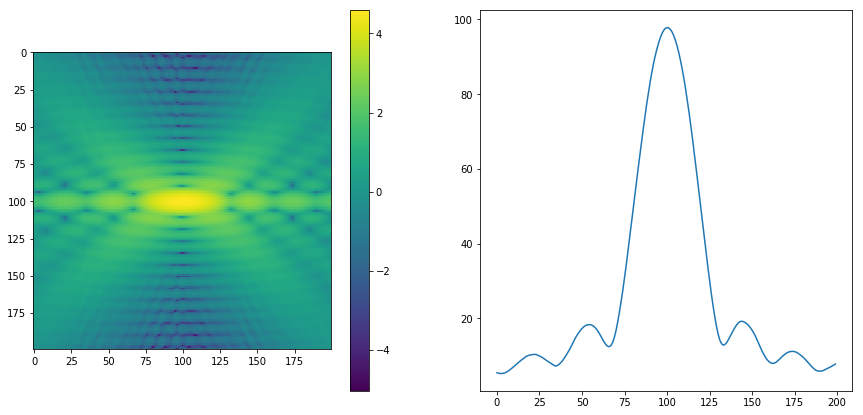

In [9]:
i = 13
var = focal_spot[i]
print(angles[i])
j = (np.shape(var[0]))[0]
k = int(j/2)

f,(ax1,ax2) = plt.subplots(1,2)
im1 = ax1.imshow(np.log(var))
f.colorbar(im1,ax=ax1)
im2 = ax2.plot(var[k,:])
f.subplots_adjust(right=1.75)
plt.show()